In [30]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [31]:
# 데이터 호출하기
path="~\\OneDrive\\python\\exploration\\Flipped-10\\"
entry_data = pd.read_csv(path+'entry_data.csv')
sales_data = pd.read_csv(path+'sales_data.csv')
item_data = pd.read_csv(path+'item_data.csv')
item_entry_data = pd.read_csv(path+'item_entry_data.csv')

In [32]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [33]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [34]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [35]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [36]:
# 문제 1: 월별 매출액 추세
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var=sales_data

# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var["date"]=sales_data["결제일시"].apply(lambda x :x[:7])
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [37]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
sales_data["결제금액"]=sales_data["결제금액"].str.split(",").str.join("").astype("int")

# sales_data의 결제금액을 숫자형태로 바꾸기


# temp_var의 payment열을 date 기준으로 집계하기
payment_data=temp_var.groupby(["date"]).sum()
payment_data

C:\Users\gibeom\AppData\Local\Temp\ipykernel_17368\2368346445.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  payment_data=temp_var.groupby(["date"]).sum()


,판매수량,결제금액
date,,
2021-02,2,7000
2021-03,511,2104500
2021-04,872,3116600
2021-05,628,2537000
2021-06,896,3621500
2021-07,285,1215000
2021-08,285,1229000
2021-09,291,1197500
2021-10,513,2138500


<BarContainer object of 15 artists>

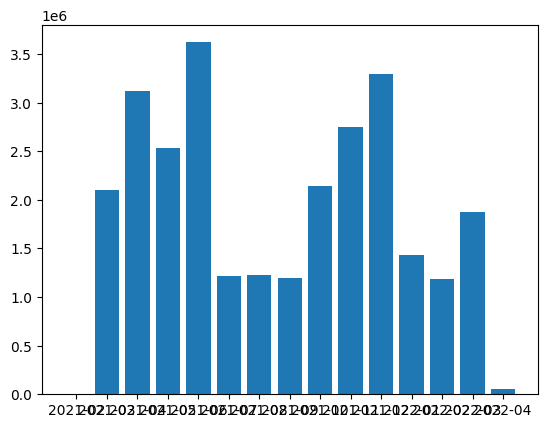

In [38]:
plt.bar(payment_data.index,payment_data["결제금액"])

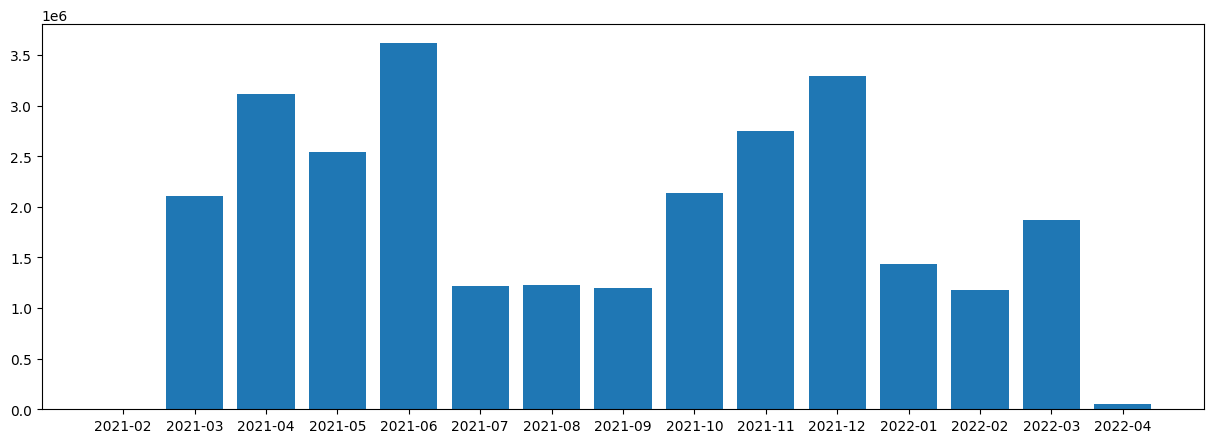

In [39]:
# 집계 결과를 시각화하기

plt.figure(figsize=(15,5))
plt.bar(payment_data.index,payment_data["결제금액"])
plt.show()

In [40]:
# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
favor_product=temp_var[temp_var['판매수량']!=-1]
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count=favor_product.groupby(["상품명"]).sum()
items_count=items_count.sort_values("판매수량",ascending=False)[:10]
items_count

C:\Users\gibeom\AppData\Local\Temp\ipykernel_17368\2612699674.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  items_count=favor_product.groupby(["상품명"]).sum()


,판매수량,결제금액
상품명,,
김치볶음밥,1204,6004400
라면,749,2941500
짜장라면,455,2038500
치즈불고기볶음밥,420,2292600
계란추가,314,157000
낙지볶음밥,312,1710700
새우볶음밥,309,1539800
아메리카노(ICE),284,1058100
치즈감자튀김,246,1354200


In [41]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = 'C:\\Windows\\Fonts\\batang.ttc'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='batang') 
mpl.font_manager.findfont(font)

'C:\\Windows\\Fonts\\batang.ttc'

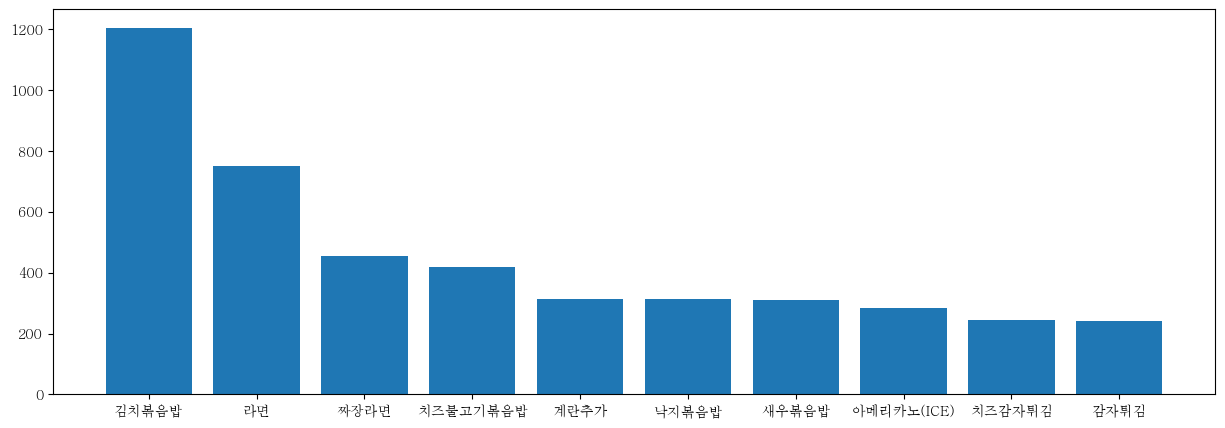

In [42]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15,5))
plt.bar(items_count.index,items_count["판매수량"])
plt.show()

In [43]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_payment=favor_product.groupby(["상품명"]).sum()
items_payment["매출"]=items_payment["판매수량"]*items_payment["결제금액"]
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment=items_payment.sort_values("매출",ascending=False)[:10]
items_payment

C:\Users\gibeom\AppData\Local\Temp\ipykernel_17368\945745528.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  items_payment=favor_product.groupby(["상품명"]).sum()


,판매수량,결제금액,매출
상품명,,,
김치볶음밥,1204,6004400,7229297600
라면,749,2941500,2203183500
치즈불고기볶음밥,420,2292600,962892000
짜장라면,455,2038500,927517500
낙지볶음밥,312,1710700,533738400
새우볶음밥,309,1539800,475798200
치즈감자튀김,246,1354200,333133200
아메리카노(ICE),284,1058100,300500400
감자튀김,242,1083800,262279600


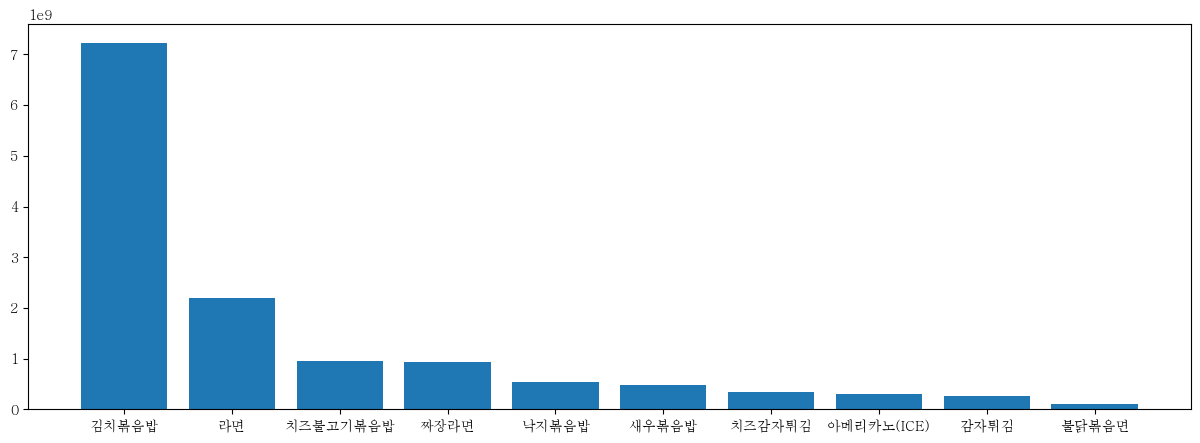

In [44]:
# 집계 결과 시각화하기
plt.figure(figsize=(15,5))
plt.bar(items_payment.index,items_payment["매출"])
plt.show()

In [45]:
# 문제 3: 가장 많이 팔린 입장권 종류
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var=entry_data

# temp_var의 금액을 숫자형태로 변환하기
temp_var["금액"]=temp_var["금액"].astype("int")

# temp_var의 금액을 요금제명을 기준으로 집계하기
ticket=temp_var.groupby(["요금제명"]).sum()
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
ticket=ticket.sort_values("금액",ascending=False)[:10]
ticket
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
# [[YOUR CODE]]

C:\Users\gibeom\AppData\Local\Temp\ipykernel_17368\3885278975.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ticket=temp_var.groupby(["요금제명"]).sum()


,금액
요금제명,
한국대생 입장권(종일권),70037000
입장권(종일권),23570500
심야-조조무제한(06시까지),11600000
심야-조조무제한,6221000
한국대생 무제한 입장권,5207500
시간요금제(1시간),2665500
시간요금제(3시간),2042000
무제한 입장권,1568600
18시이후 무제한,1330500


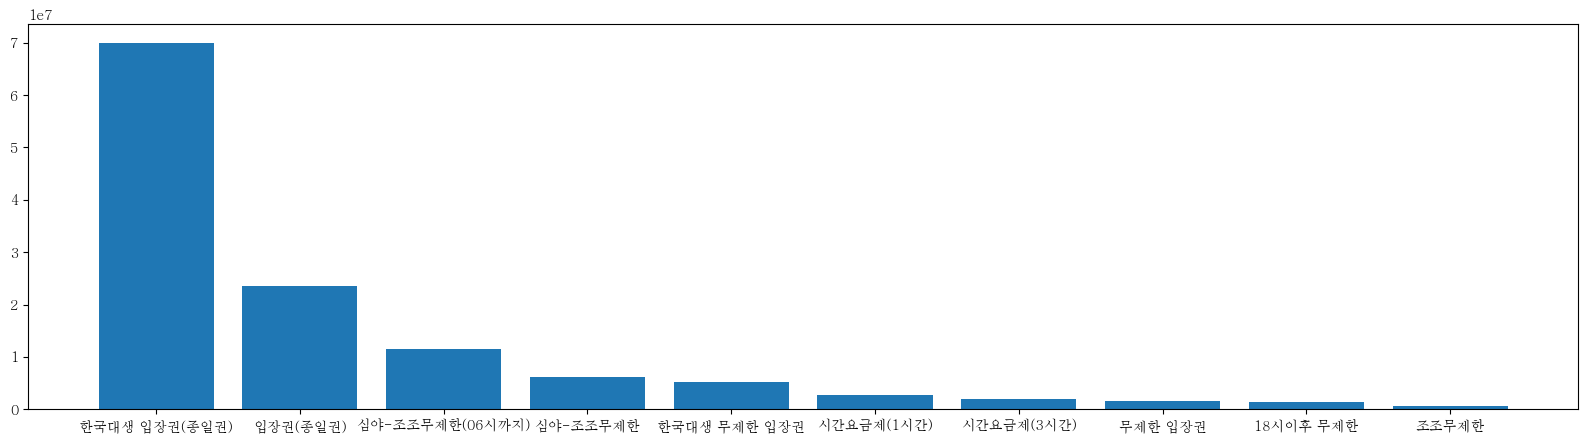

In [46]:
# 집계 결과 시각화하기
plt.figure(figsize=(20,5))
plt.bar(ticket.index,ticket["금액"])
plt.show()

In [50]:
# [[YOUR CODE]]
favor_product=sales_data[sales_data['판매수량']!=-1]
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count=favor_product.groupby(["date","상품명"]).sum()
items_count

C:\Users\gibeom\AppData\Local\Temp\ipykernel_17368\4090701089.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  items_count=favor_product.groupby(["date","상품명"]).sum()


판매수량   결제금액
date    상품명                    
2021-02 아메리카노(HOT)     4  14000
        카페라떼(HOT)      2   8000
        카페모카(HOT)      4  18000
2021-03 감자튀김          13  58500
        계란추가          34  17000
...                  ...    ...
2022-04 순살닭다리덮밥        1   8000
        아이스티           1   3900
        짜장라면(계란추가)     1   5500
        치킨카라아케 6pc     1   4500
        크로플            1   5500

[684 rows x 2 columns]

In [51]:
# [[YOUR CODE]]
items_count["판매수량"]

date     상품명       
2021-02  아메리카노(HOT)     4
         카페라떼(HOT)      2
         카페모카(HOT)      4
2021-03  감자튀김          13
         계란추가          34
                       ..
2022-04  순살닭다리덮밥        1
         아이스티           1
         짜장라면(계란추가)     1
         치킨카라아케 6pc     1
         크로플            1
Name: 판매수량, Length: 684, dtype: int64

In [52]:
# [[YOUR CODE]]
vac_items=items_count.loc[["2021-02","2021-07","2021-08","2022-01","2022-02"]]
non_vac_items=items_count.drop(vac_items.index)
non_vac_items

판매수량    결제금액
date    상품명                     
2021-03 감자튀김          13   58500
        계란추가          34   17000
        김치볶음밥         98  485000
        낙지볶음밥         30  162500
        녹차라떼(HOT)      1    4500
...                  ...     ...
2022-04 순살닭다리덮밥        1    8000
        아이스티           1    3900
        짜장라면(계란추가)     1    5500
        치킨카라아케 6pc     1    4500
        크로플            1    5500

[483 rows x 2 columns]

In [53]:
# [[YOUR CODE]]
filter_temp=non_vac_items.groupby('상품명').sum()
filter_temp=filter_temp.sort_values("결제금액",ascending=False)[:10]
filter_temp

,판매수량,결제금액
상품명,,
김치볶음밥,1045,5216400
라면,609,2384000
치즈불고기볶음밥,359,1962100
짜장라면,366,1638000
낙지볶음밥,263,1441200
새우볶음밥,272,1358800
치즈감자튀김,200,1101200
감자튀김,202,903800
아메리카노(ICE),243,897600


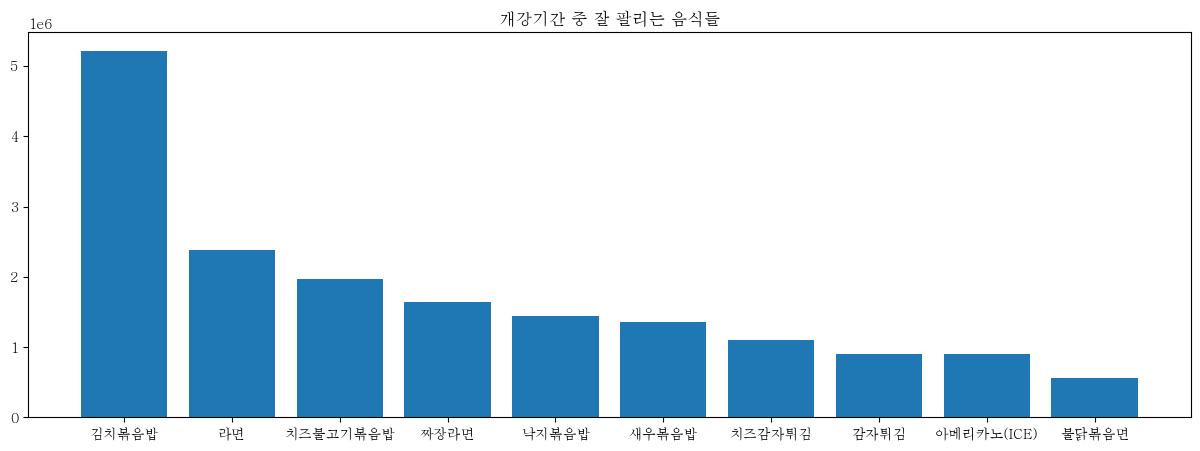

In [54]:
# [[YOUR CODE]]
plt.figure(figsize=(15,5))
plt.title("개강기간 중 잘 팔리는 음식들")
plt.bar(filter_temp.index,filter_temp["결제금액"])
plt.show()

In [55]:
# [[YOUR CODE]]
filter_temp=vac_items.groupby('상품명').sum()
filter_temp=filter_temp.sort_values("결제금액",ascending=False)[:10]
filter_temp

,판매수량,결제금액
상품명,,
김치볶음밥,159,788000
라면,140,557500
짜장라면,89,400500
치즈불고기볶음밥,61,330500
낙지볶음밥,49,269500
치즈감자튀김,46,253000
새우볶음밥,37,181000
감자튀김,40,180000
아메리카노(ICE),41,160500


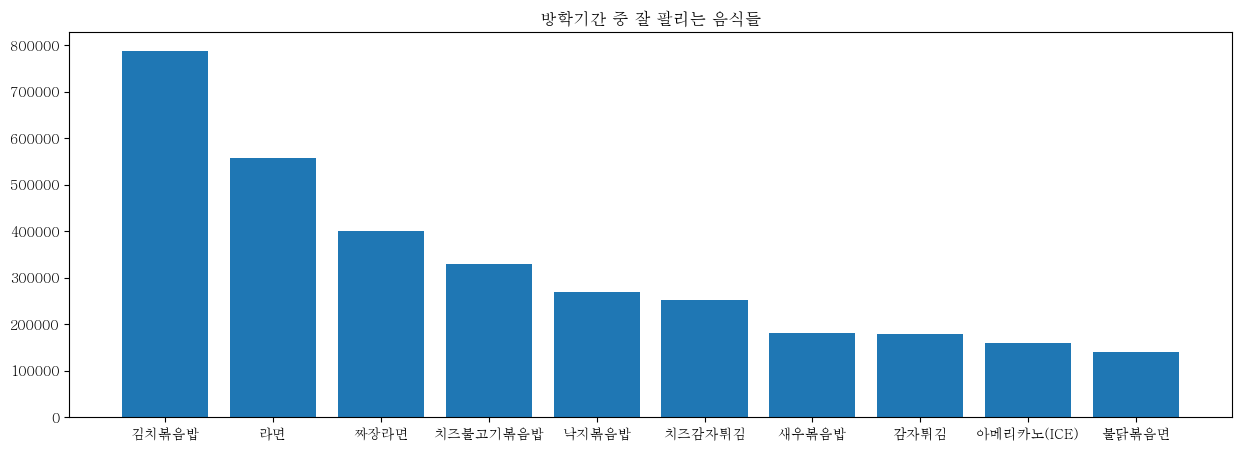

In [56]:
# [[YOUR CODE]]
plt.figure(figsize=(15,5))
plt.title("방학기간 중 잘 팔리는 음식들")
plt.bar(filter_temp.index,filter_temp["결제금액"])
plt.show()

개강기간과 방학기간에 잘팔린는 음식들을 분석해 보았다.  
그결과 3위부터 7위에 해당하는 짜장라면, 치즈불고기볶음밥, 낙지볶음밥, 치즈감자튀김, 새우볶음밥의 순서가 조금씩 뒤바뀌는것을 알 수 있다.  
또한 김치볶음밥 대비 라면의 판매량이 약간 증가하는 것을 알 수 있다.

따라서 개강기간이냐 방학기간이냐에 따라서 전체 준비 재료들의 비율을 살짝 바꿀필요가 있어보인다.
